## **Сервис прогнозирования отмены в системе интернет-бронирования отелей**

In [ ]:
# подключим библиотеки

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("dark")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: ignored

In [ ]:
# добавим данные в датаафрейм

df = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/hotel_bookings.csv')

In [ ]:
# устанавливаем максимальное количество столбцов равным none

pd.set_option('display.max_columns', None)

#### Первоначальный обзор данных

**Data dictionary:**

1. `hotel`: Hotel (H1 = Resort Hotel or H2 = City Hotel)
2. `is_canceled`: Value indicating if the booking was canceled (1) or not (0)
3. `lead_time`: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
4. `arrival_date_year`: Year of arrival date
5. `arrival_date_month`: Month of arrival date
6. `arrival_date_week_number`: Week number of year for arrival date
7. `arrival_date_day_of_month`: Day of arrival date
8. `stays_in_weekend_nights`: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
9. `stays_in_week_nights`: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
10. `adults`: Number of adults
11. `children`: Number of children
12. `babies`: Number of babies
13. `meal`: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
14. `country`: Country of origin. Categories are represented in the ISO 3155–3:2013 format
15. `market_segment`: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
16. `distribution_channel`: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
17. `is_repeated_guest`: Value indicating if the booking name was from a repeated guest (1) or not (0)
18. `previous_cancellations`: Number of previous bookings that were cancelled by the customer prior to the current booking
19. `previous_bookings_not_canceled`: Number of previous bookings not cancelled by the customer prior to the current booking
20. `reserved_room_type`: Code of room type reserved. Code is presented instead of designation for anonymity reasons
21. `assigned_room_type`: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons
22. `booking_changes`: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
23. `deposit_type`: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay
24. `agent`: ID of the travel agency that made the booking
25. `company`: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
26. `days_in_waiting_list`: Number of days the booking was in the waiting list before it was confirmed to the customer
27. `customer_type`: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
28. `adr`: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
29. `required_car_parking_spaces`: Number of car parking spaces required by the customer
30. `total_of_special_requests`: Number of special requests made by the customer (e.g. twin bed or high floor)
31. `reservation_status`: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
32. `reservation_status_date`: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [ ]:
# выведем первые 5 строк таблицы

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [ ]:
column = df["reservation_status_date"]

min_value = column.min()
max_value = column.max()

In [ ]:
min_value

'01-01-15'

In [ ]:
max_value

'31-12-16'

Столбец `is_cancelled` является зависимой переменной в наборе данных. Номер 1 представляет бронирование, которое было отменено, а номер 0 — бронирование, которое не было отменено.

#### Информация о наборе данных

In [ ]:
# узнаем количество строк и столбцов в датафрейме

df.shape

(119390, 32)

In [ ]:
# распечатаем краткое резюме датафрейма

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# создаем описательную статистику датафрейма

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### EDA (Разведочный анализ данных)

In [ ]:
# метки столбцов датафрейма

df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# уникальные типы отелей в датафрейме

df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

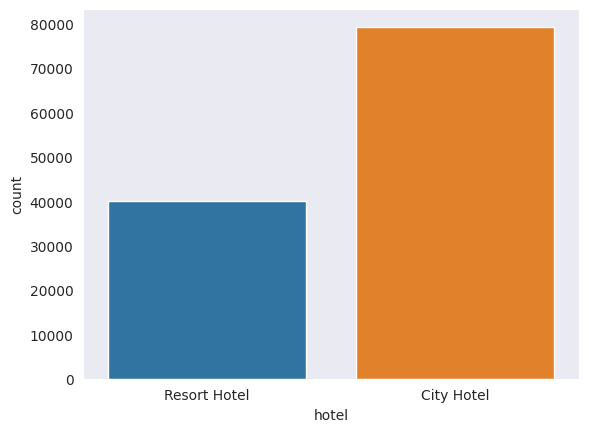

In [ ]:
# распределение по отелям Resort Hotel и City Hotel

sns.countplot(data=df, x='hotel');

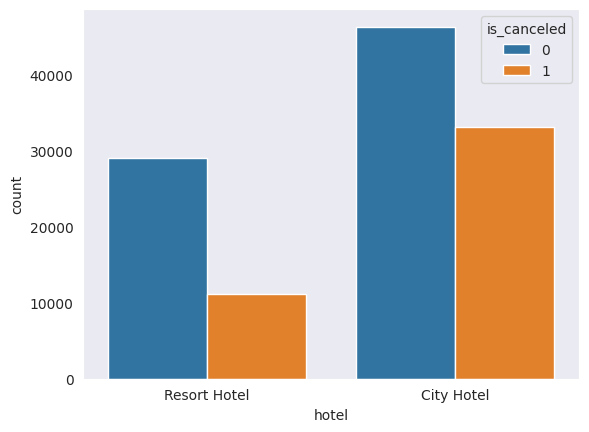

In [ ]:
# отменена ли бронь в отеле

sns.countplot(data=df, x='hotel', hue='is_canceled');

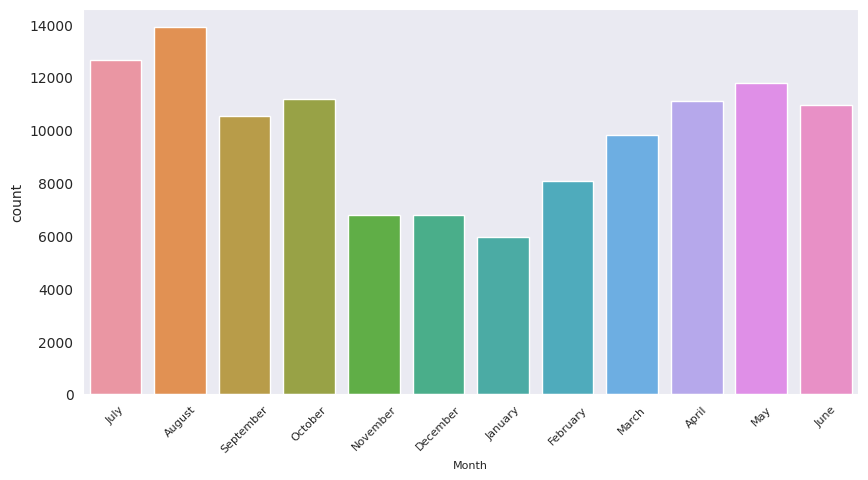

In [ ]:
# распределение даты прибытия в отель по месяцам

fig = plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x='arrival_date_month')
plt.xlabel('Month', fontsize=8)
plt.xticks(rotation=45, fontsize=8);

In [ ]:
# уникальные типы номеров отелей в датафрейме

df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

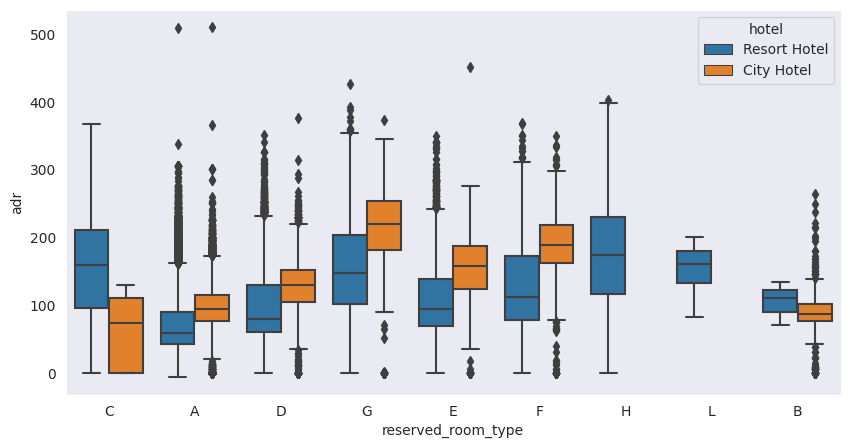

In [ ]:
# распределение средней стоимости проживания в номере за одну ночь по типам номеров

data = df[df['is_canceled']==0]
fig = plt.figure(figsize=(10,5), dpi=100)
sns.boxplot(data=data, x='reserved_room_type', y='adr', hue='hotel');

adr mean: 101.83112153446686



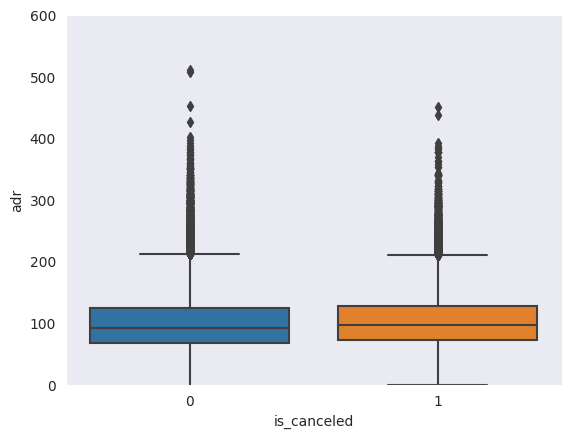

In [ ]:
# распределение средней стоимости проживания в номере за одну ночь как для отмененных, так и для не отмененных бронирований

sns.boxplot(data=df, x='is_canceled', y='adr')
plt.ylim(0,600)
print("adr mean:", df['adr'].mean())
print()

In [ ]:
# количество значений для каждой страны

df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

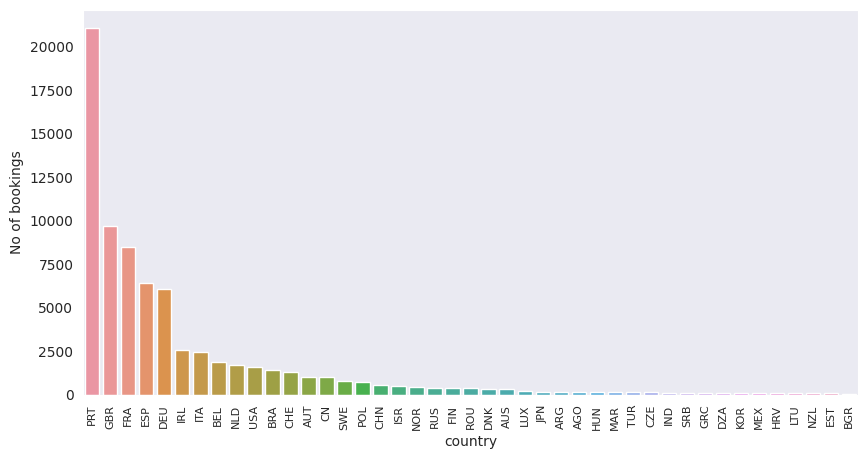

In [ ]:
# количество неотмененных бронирований для каждой страны

fig = plt.figure(figsize=(10,5), dpi=100)


country_wise_bookings = df[(df['is_canceled']==0)]['country'].value_counts().reset_index()
country_wise_bookings.columns = ['country', 'No of bookings']

country_wise_bookings = country_wise_bookings[country_wise_bookings['No of bookings'] > 60]

sns.barplot(data=country_wise_bookings, x='country', y='No of bookings')
plt.xticks(rotation=90, fontsize=8);

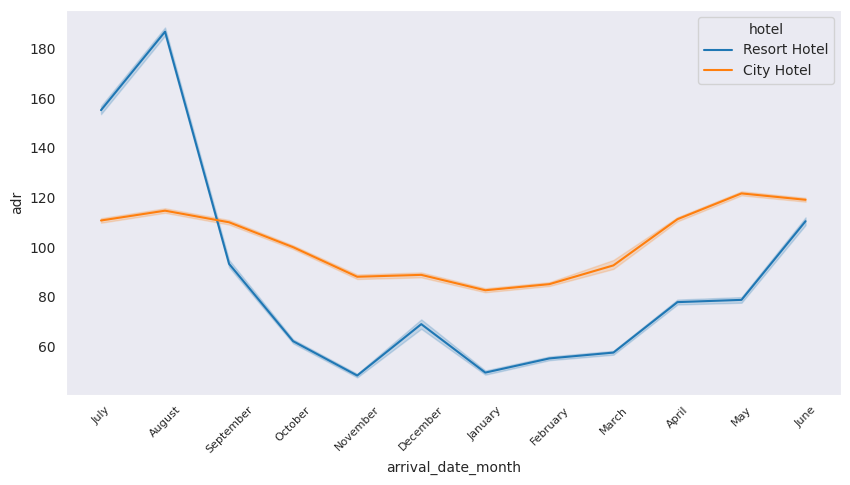

In [ ]:
# распределение средней стоимости проживания в номере за одну ночь по месяцам прибытия

fig = plt.figure(figsize=(10,5), dpi=100)

sns.lineplot(data=df, x='arrival_date_month', y='adr', hue='hotel')
plt.xticks(rotation=45, fontsize=8);

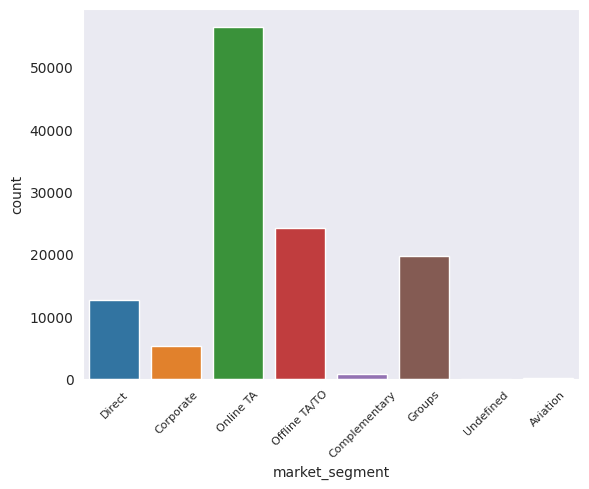

In [ ]:
# распределение сегментов рынка

sns.countplot(data=df, x='market_segment')
plt.xticks(rotation=45, fontsize=8);

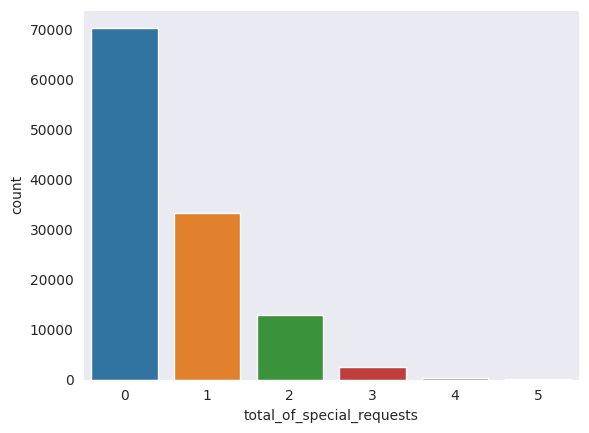

In [ ]:
# распределение общего количества специальных запросов

sns.countplot(data=df, x='total_of_special_requests');

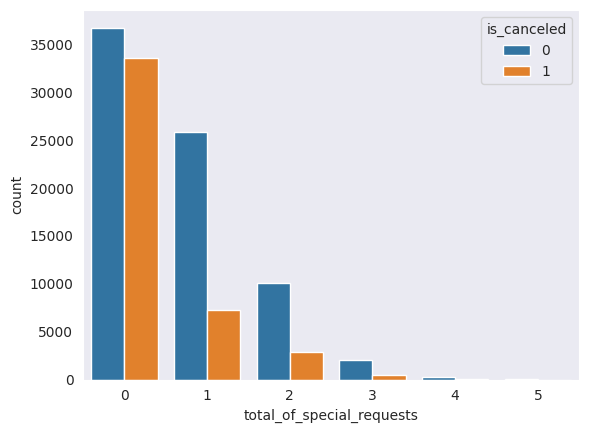

In [ ]:
# распределение общего количества специальных запросов как для отмененных, так и для не отмененных бронирований

sns.countplot(data=df, x='total_of_special_requests', hue='is_canceled');

#### Подготовка данных

In [ ]:
# пропуски данных

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Мы удаляем ряд признаков по разным причинам. Признаки `company`, `agent` и `country` отбрасываются из-за большого количества пропусков. Признак `children` не удаляется, так как пропусками являются только несколько значений. Однако наблюдения, в которых есть пропуски для `children`, удаляются. Признак `reservation_status` удален, так как это могло бы стать источником утечки данных. Этот признак имеет категории «No-Show: Неявка», «Check-Out: Выезд» и «Canceled: Отмена». Таким образом, мы могли бы вывести метку целевого класса из значения, указанного в `reservation_status`. Также отбрасывается признак `arrival_date_week_number`, так как он коррелирует с `arrival_date_month`. Таким образом, наличие этого признака привело бы к мультиколлинеарности. Наконец, `booking_changes` отбрасывается, так как значения могут меняться со временем и могут привести к утечке данных.

In [ ]:
# обработка пропусков в данных

df.drop(['company', 'country', 'agent', 'reservation_status', 'arrival_date_week_number', 'booking_changes'], axis=1, inplace=True)
df.dropna(subset=['children'], inplace=True)

In [ ]:
# проверка

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date           0
dtype: int64

In [ ]:
# проверяем балансировку

print(df["is_canceled"].value_counts())

0    75166
1    44220
Name: is_canceled, dtype: int64


Вывод показывает, что существует дисбаланс в количестве классов. Хотя дисбаланс не является серьезным, мы постараемся оценить классификаторы машинного обучения с помощью сложных метрик, таких как precision и recall, поскольку эти метрики учитывают любые дисбалансы классов.

---

Прежде чем строить модели машинного обучения, мы можем провести дополнительный анализ. Мы анализируем и исследуем данные, чтобы увидеть, сможем ли мы выявить какие-либо тенденции или закономерности.

In [ ]:
# проверяем корреляцию между метками и признаками

print(df.corr()["is_canceled"].sort_values(ascending=False))

is_canceled                       1.000000
lead_time                         0.293177
previous_cancellations            0.110140
adults                            0.059990
days_in_waiting_list              0.054193
adr                               0.047622
stays_in_week_nights              0.024771
arrival_date_year                 0.016732
children                          0.005048
stays_in_weekend_nights          -0.001783
arrival_date_day_of_month        -0.006084
babies                           -0.032488
previous_bookings_not_canceled   -0.057355
is_repeated_guest                -0.084788
required_car_parking_spaces      -0.195492
total_of_special_requests        -0.234706
Name: is_canceled, dtype: float64


Мы создаем тепловую карту корреляции, чтобы легко обнаруживать любые случаи высокой мультиколлинеарности. Сильная мультиколлинеарность нарушает одно из допущений модели логистической регрессии и может привести к нестабильным и ненадежным оценкам. Как правило, любые значения корреляции Пирсона выше 0,7 обычно указывают на высокую мультиколлинеарность между переменными.

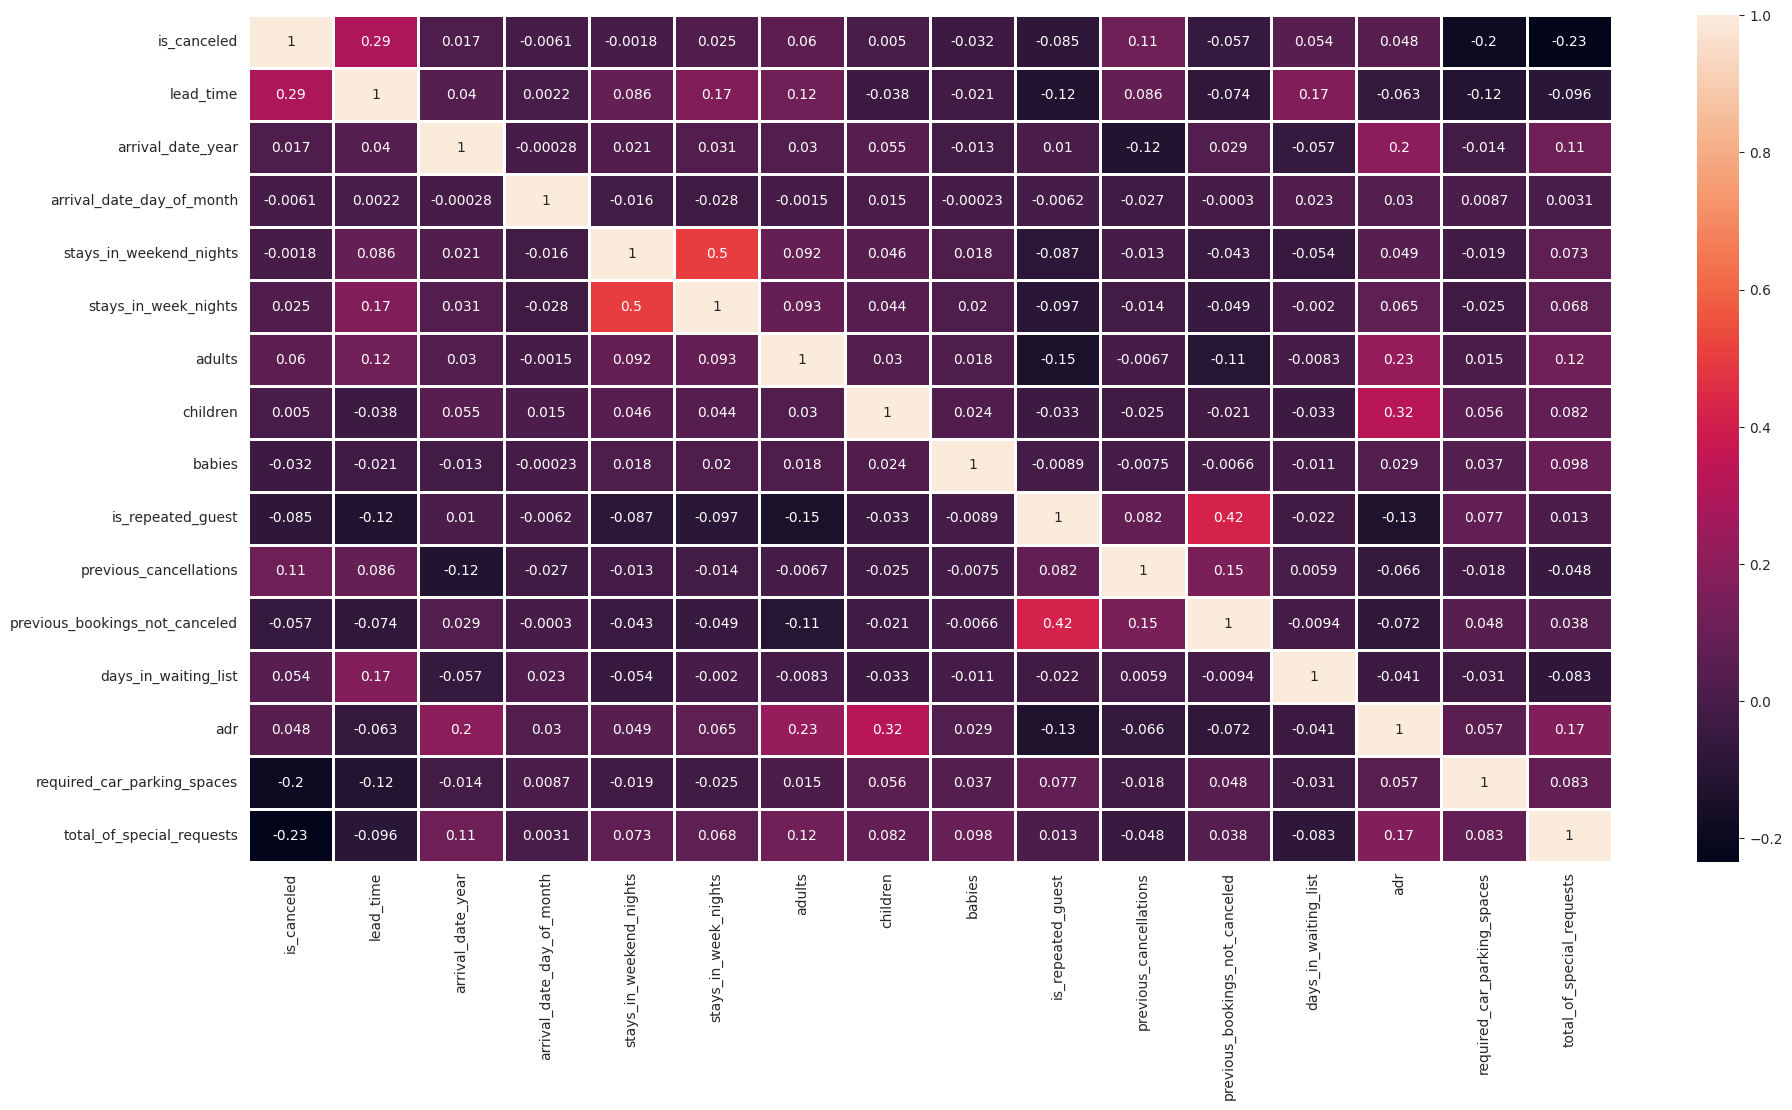

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 11))

corr = df.corr()
sns.heatmap(corr, annot=True, linewidths=1)
plt.show();

Тепловая карта корреляции показывает, что сильной мультиколлинеарности нет.

In [ ]:
# количество значений для типа отеля (по отелям Resort Hotel и City Hotel)

df["hotel"].value_counts()

City Hotel      79326
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
# сводная таблица агрегации сгруппированных значений на основе пересечения customer_type с отмененными/неотмененными бронированиями

pivot = pd.pivot_table(df, index="is_canceled", columns="customer_type", values="lead_time", aggfunc="count", margins=True)
pivot

customer_type,Contract,Group,Transient,Transient-Party,All
is_canceled,,,,,
0,2814,518,53099,18735,75166
1,1262,59,36514,6385,44220
All,4076,577,89613,25120,119386


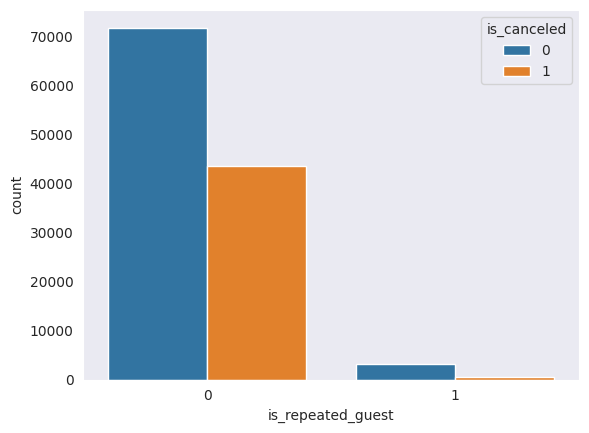

In [ ]:
# распределение повторных гостей как для отмененных, так и для не отмененных бронирований

sns.countplot(data=df, x='is_repeated_guest', hue='is_canceled')
plt.show();

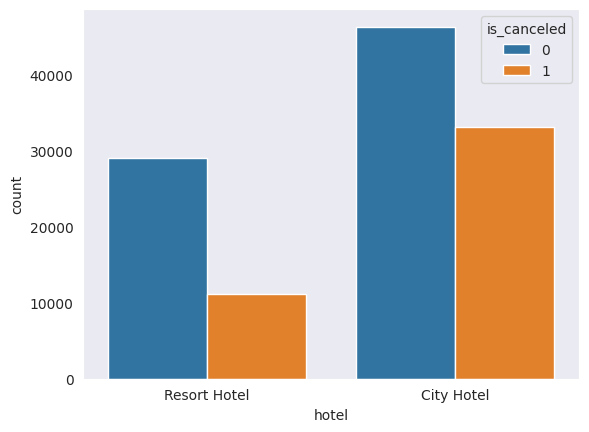

In [ ]:
# распределение по типу отеля с отмененными/неотмененными бронированиями

sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.show();

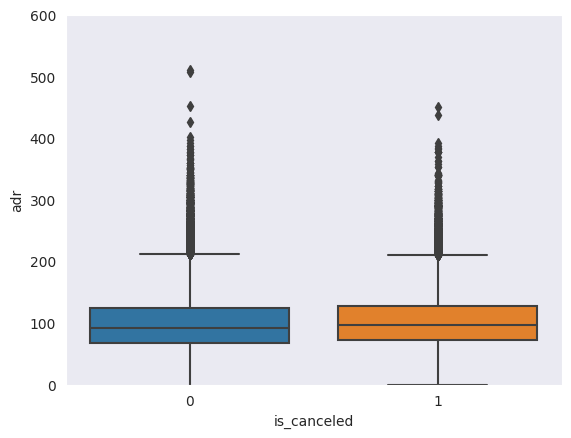

In [ ]:
# распределение средней стоимости проживания в номере за одну ночь как для отмененных, так и для не отмененных бронирований

sns.boxplot(data=df, x='is_canceled', y='adr')
plt.ylim(0,600)
plt.show();

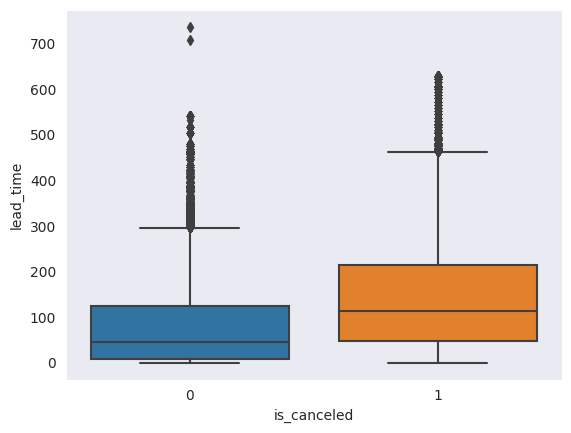

In [ ]:
# распределение количества дней, прошедших между датой ввода бронирования в PMS
# и датой прибытия как для отмененных, так и для не отмененных бронирований

sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.show();

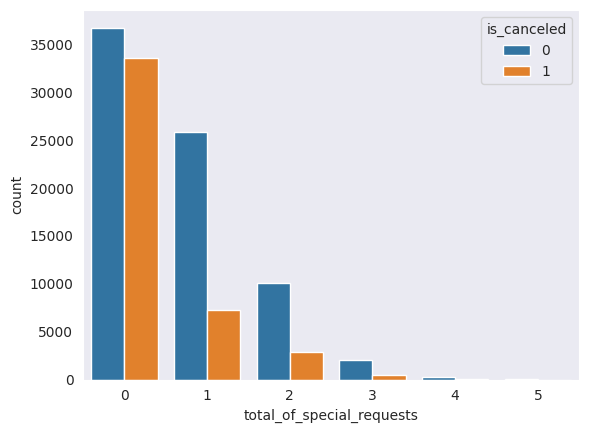

In [ ]:
# распределение общего количества специальных запросов как для отмененных, так и для не отмененных бронирований

sns.countplot(data=df, x='total_of_special_requests', hue='is_canceled')
plt.show();

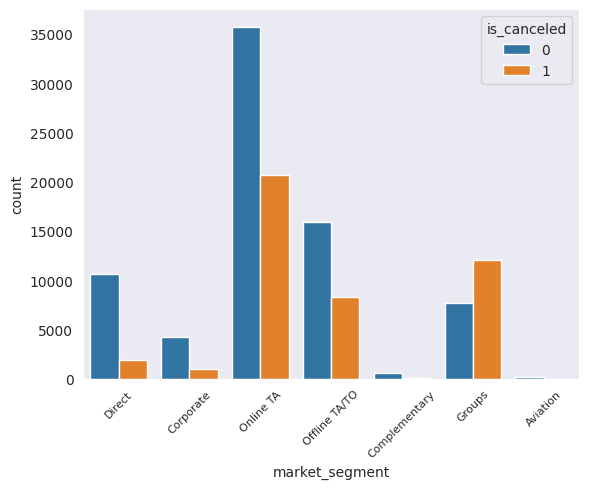

In [ ]:
# распределение по сегментам рынка как для отмененных, так и для не отмененных бронирований

sns.countplot(data=df, x='market_segment', hue='is_canceled')
plt.xticks(rotation=45, fontsize=8)
plt.show();

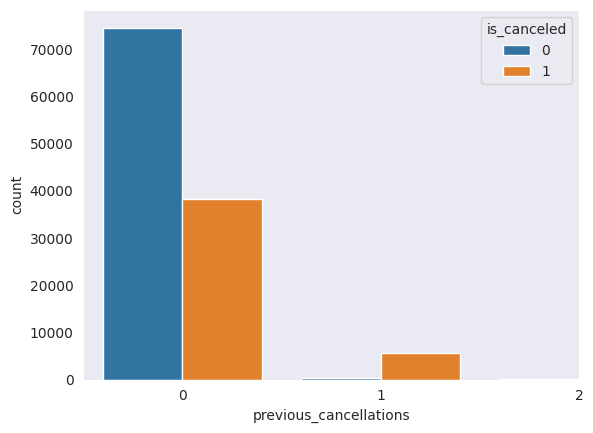

In [ ]:
# распределение по предыдущим отменам как для отмененных, так и для не отмененных бронирований

sns.countplot(data=df, x='previous_cancellations', hue='is_canceled')
plt.xlim(-0.5,2)
plt.show();

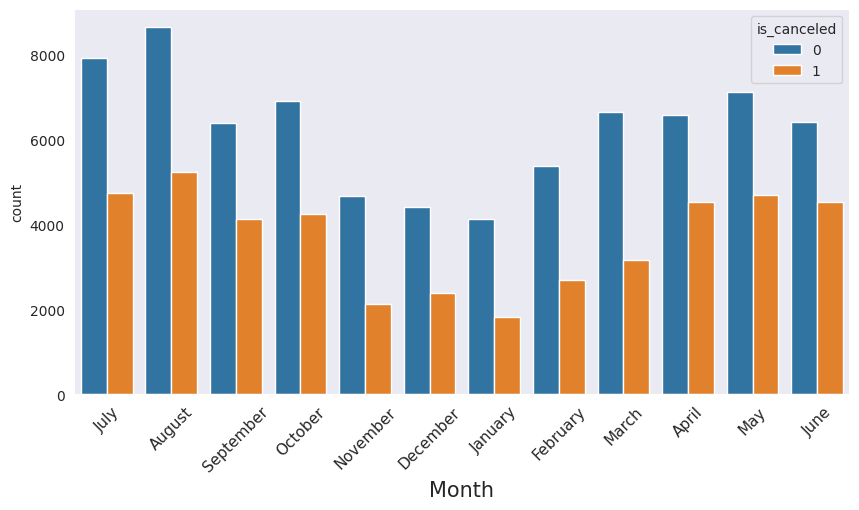

In [ ]:
# распределение по месяцам прибытия как для отмененных, так и для не отмененных бронирований

fig = plt.figure(figsize=(10,5))
sns.countplot(data=df, x='arrival_date_month', hue='is_canceled')
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation=45, fontsize=11)
plt.show();

Разведочный анализ данных, проведенный выше, выявил некоторые интересные закономерности и взаимосвязи между переменными. Некоторые из наиболее заметных наблюдений представлены ниже.

* клиенты, подпадающие под категорию «transient: временных», с большей вероятностью отменят бронирование.
* повторные гости с меньшей вероятностью отменят бронирование
* среднее время выполнения lead_time значительно выше для отмененных бронирований
* чем больше количество специальных запросов, тем меньше вероятность отмены бронирования
* бронирования, поступающие от онлайн-турагентов «Online TA», с большей вероятностью будут отменены, чем бронирования из любого другого сегмента рынка
* гости, у которых были предыдущие отмены, значительно чаще отменяют бронирование

#### Pre-processing

In [ ]:
# определяем целевую переменную от других признаков

label = df["is_canceled"]
df.drop(['is_canceled'], axis=1, inplace=True)

# определяем числовые и категориальные признаки

df_num=df.select_dtypes(["int64","float"])
df_cat=df.select_dtypes("object")

In [ ]:
# выведем уникальные значения в каждом категориальном признаке

for i in df_cat:
    print(i,df[i].nunique())

hotel 2
arrival_date_month 12
meal 5
market_segment 7
distribution_channel 5
reserved_room_type 10
assigned_room_type 12
deposit_type 3
customer_type 4
reservation_status_date 926


Чтобы подготовить данные для моделей машинного обучения, мы должны выполнить некоторые этапы предварительной обработки. Начнем с применения SimpleImputer для замены отсутствующих значений модой (`strategy="most_frequent"`) для этого признака. После этого мы выполняем масштабирование признаков для всех числовых переменных, кодируя также все категориальные переменные. Поскольку категориальные переменные и числовые переменные требуют разных этапов предварительной обработки, мы создаем два разных пайплайна. Затем мы создаем экземпляр объекта преобразования столбца, чтобы мы могли применять разные пайплайны к разным столбцам.

Хотя мы признали, что нам нужно кодировать категориальные данные, нам все еще нужно решить, какой тип категориального кодирования будет реализован. Из приведенного выше вывода видно, что для большинства категориальных признаков существует множество уникальных значений. Таким образом, (one-hot encoding) кодирование привело бы к созданию огромного количества новых признаков, что нежелательно. Следовательно, чтобы избежать проклятия размерности, мы используем порядковое кодирование (ordinal encoding), а не (one-hot encoding) кодирование.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

si = SimpleImputer(strategy="most_frequent")
ss = StandardScaler()
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore')


num_pipeline = Pipeline([("imputer", si), ("scaler", ss)])
cat_pipeline = Pipeline([("imputer", si), ("encoder", oe)])
# новый пайплайн
cat_pipeline_log_regr = Pipeline([("imputer", si), ("encoder", ohe)])

mct = make_column_transformer((num_pipeline, df_num.columns),
                            (cat_pipeline, df_cat.columns),
                            remainder="passthrough")

# кодирование стлобцов с использованием нового пайплайна
mct_lr = make_column_transformer((num_pipeline, df_num.columns),
                            (cat_pipeline_log_regr, df_cat.columns),
                            remainder="passthrough")

df_transformed_1 = mct.fit_transform(df)
df_transformed_2 = mct_lr.fit_transform(df)
a = list(mct_lr.get_feature_names_out())
col=list(map(lambda x : x.split("__")[1],a))
a = list(df_num.columns)
b = list(df_cat.columns)
c = a + b
df_transformed = pd.DataFrame(data=list(df_transformed_1),columns=c)
df_transformed.head()

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date
0,2.227016,-1.634869,-1.685341,-0.928892,-1.310242,0.247920,-0.260663,-0.081581,-0.181564,-0.103181,-0.091556,-0.131926,-2.015131,-0.254877,-0.720666,1.0,5.0,0.0,3.0,1.0,2.0,2.0,0.0,2.0,15.0
1,5.923343,-1.634869,-1.685341,-0.928892,-1.310242,0.247920,-0.260663,-0.081581,-0.181564,-0.103181,-0.091556,-0.131926,-2.015131,-0.254877,-0.720666,1.0,5.0,0.0,3.0,1.0,2.0,2.0,0.0,2.0,15.0
2,-0.907844,-1.634869,-1.685341,-0.928892,-0.786210,-1.478425,-0.260663,-0.081581,-0.181564,-0.103181,-0.091556,-0.131926,-0.530995,-0.254877,-0.720666,1.0,5.0,0.0,3.0,1.0,0.0,2.0,0.0,2.0,46.0
3,-0.851697,-1.634869,-1.685341,-0.928892,-0.786210,-1.478425,-0.260663,-0.081581,-0.181564,-0.103181,-0.091556,-0.131926,-0.530995,-0.254877,-0.720666,1.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,46.0
4,-0.842340,-1.634869,-1.685341,-0.928892,-0.262178,0.247920,-0.260663,-0.081581,-0.181564,-0.103181,-0.091556,-0.131926,-0.075860,-0.254877,0.540695,1.0,5.0,0.0,6.0,3.0,0.0,0.0,0.0,2.0,76.0


#### Модели

Мы используем несколько классификаторов машинного обучения, чтобы предсказать, будет ли отменено бронирование отеля. Для этого исследования выбраны логистическая регрессия (Logistic Regression), дерево решений (Decision Tree), случайный лес (Random Forest) и классификатор голосования (Voting Classifier). Данные разделены на обучающие данные и тестовые данные. 70% данных используются для обучения модели, а остальные 30% используются в качестве тестовых данных. Тестовые данные позволяют нам оценить, как каждая модель работает с новыми данными. Перед развертыванием любых моделей создается окончательный набор пайплайнов. Он состоит из преобразований столбцов, содержащих этапы предварительной обработки, а также отдельных моделей машинного обучения.

In [ ]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from datetime import datetime

# данный блок отвечает за сортировку данных по дате
cols = ['arrival_date_year','arrival_date_month','arrival_date_day_of_month']

# преобразование данных из cols сначала в строки , потом и в даты
df['str_date']= df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df['Date'] = df['str_date'].apply(lambda row : datetime.strptime(row, '%Y %B %d'))

# сортировка
df=df.sort_values(by=['Date'])

# удаление временных столбцов
df.drop(['str_date','Date'],inplace=True,axis=1)
x = df
y = label

# разделение данных на train и test выборки
tscv = TimeSeriesSplit(n_splits=10)

lr = LogisticRegression(max_iter=1000)

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

classifiers = [("Logistic Regression", lr), ("DecisionTreeClassifier", dt), ("RandomForestClassifier", rf)]

vc = VotingClassifier(estimators=classifiers, voting='soft')

pipe_final1 = Pipeline([("column transformer", mct_lr),("Logistic Regression", lr)])
pipe_final2 = Pipeline([("column transformer", mct),("Decision Tree", dt)])
pipe_final3 = Pipeline([("column transformer", mct),("Random Forest", rf)])
pipe_final4 = Pipeline([("column transformer", mct),("Voting Classifier", vc)])

In [ ]:
df.shape

(119386, 25)

#### Оценка моделей

Функция оценки создается и определяется для эффективного представления и сравнения показателей оценки для каждой модели. Функция принимает объект модели машинного обучения, а также обучающие и тестовые значения для x и y в качестве входных данных. Затем функция возвращает показатель точности (accuracy score), показатель ROC (ROC score), матрицу путаницы (confusion matrix), отчет о классификации (classification report) и график ROC (ROC graph) для введенной модели. Мы также анализируем важность функций наиболее эффективной древовидной модели.

************************************************** 
 Logistic Regression metrics 
Accuracy Score is 0.6048558002395651 
Roc Auc Score 0.6121974088517999 
Confusion Matrix 
 [[42118 29380]
 [13505 23527]] 
Classification Report 
               precision    recall  f1-score   support

           0       0.76      0.59      0.66     71498
           1       0.44      0.64      0.52     37032

    accuracy                           0.60    108530
   macro avg       0.60      0.61      0.59    108530
weighted avg       0.65      0.60      0.62    108530

************************************************** 
 Decision Tree metrics 
Accuracy Score is 0.5705703492121994 
Roc Auc Score 0.512315727373956 
Confusion Matrix 
 [[49745 21753]
 [24853 12179]] 
Classification Report 
               precision    recall  f1-score   support

           0       0.67      0.70      0.68     71498
           1       0.36      0.33      0.34     37032

    accuracy                           0.57    108530
   m

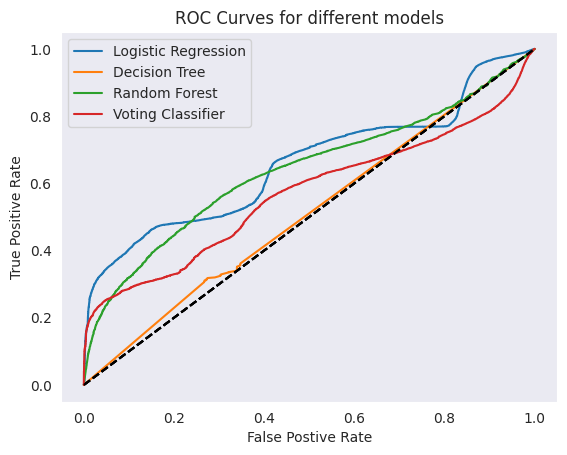

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


score_values=[]


def evaluation(model, x,y, test="test"):
    '''Задачей данного кода является вычисление всех предсказаний с помощью TimeSeriesSplit
    Данный датасет хранит в себе данные о предсказаниях,вероятностей и истинных значений для всего набора данных за исключением трейн части первого разбиения.
    Т.е. все полученные предсказания основываются на предыдущих , отсортированных ранее по дате.
'''
    pred_frame=pd.DataFrame(columns=['index','y_pred','y_proba','y_test'])
    # используем различные разбиения TimeSeriesSplit
    for train_index, test_index in tscv.split(x):
      # предсказываемые данные при таком разбиении не пересекаются
      pred_frame_temp=pd.DataFrame(columns=['index','y_pred','y_proba','y_test'])
      # разбиваем x и y по индексам из tscv.split(x)
      x_train,y_train,x_test,y_test=x.iloc[train_index,:],y.iloc[train_index],x.iloc[test_index,:],y.iloc[test_index]
      model.fit(x_train, y_train)
      assert(len(test_index)==len(model.predict(x_test))==len(y_test.values))
      # записываем предсказания при разбиении во временный датасет  pred_frame_temp
      pred_frame_temp['index']=test_index
      pred_frame_temp['y_pred']=model.predict(x_test)
      pred_frame_temp['y_proba']=model.predict_proba(x_test)[:,1]
      pred_frame_temp['y_test']=y_test.values
      # после каждой итерации присоединяем датасет предсказаний и истинных значений на определенном разбиении к общему датасету предсказаний
      pred_frame=pd.concat([pred_frame, pred_frame_temp])
    # присваиваем переменным колонки из pred_frame. Дальнейший код функции изменения не подвергался
    y_pred,y_prob,y_test=pred_frame['y_pred'].values.astype(int),pred_frame['y_proba'].values,pred_frame['y_test'].values.astype(int)
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cl = classification_report(y_test, y_pred)
    print('*'*50,"\n",test,"metrics","\nAccuracy Score is",acc,"\nRoc Auc Score",roc_auc,
          "\nConfusion Matrix","\n",cm,"\nClassification Report","\n",cl)

    score_values.append(acc)
    score_values.append(roc_auc)

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=test)
    plt.xlabel("False Postive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for different models")
    plt.plot([0,1],[0,1],"k--")
    plt.legend()

model_list=[("Logistic Regression", pipe_final1),
              ("Decision Tree", pipe_final2),
              ("Random Forest", pipe_final3),
              ("Voting Classifier", pipe_final4)]

for name,model_type in model_list:
    evaluation(model_type,x,y, test=name)

plt.show()

In [ ]:
metric_table = pd.DataFrame(score_values[0:2], columns=["Logistic Regression"])
metric_table["Decision Tree"] = score_values[2:4]
metric_table["Random Forest"] = score_values[4:6]
metric_table["Voting Classifier"] = score_values[6:8]
metric_table["Metric"] = ["Accuracy Score", "ROC-AUC Score"]
metric_table.set_index("Metric", inplace=True)
metric_table

,Logistic Regression,Decision Tree,Random Forest,Voting Classifier
Metric,,,,
Accuracy Score,0.604856,0.570570,0.691385,0.640026
ROC-AUC Score,0.612197,0.512316,0.621252,0.565128


In [ ]:
feat_importance = pipe_final3.named_steps["Random Forest"].feature_importances_
feat_importance = pd.DataFrame(index=c, data=feat_importance,
columns = ['Feature Importance']).sort_values('Feature Importance', ascending=False)
feat_importance

,Feature Importance
arrival_date_month,0.363982
arrival_date_year,0.189074
lead_time,0.083170
adr,0.082594
arrival_date_day_of_month,0.061479
reservation_status_date,0.059307
stays_in_week_nights,0.023745
stays_in_weekend_nights,0.015985
assigned_room_type,0.014568
total_of_special_requests,0.013595
